# CNA Homework

## Submitted by: Noa Kotler, Nitzan Tal

#### Note: This notebook contrains an interactive widget so it should be run for the widget to work. However, it has all the required solutions even without the widget.

## Part 1

**Reddit Networks**

Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/), select the subreddit of your favorite TV show. Using the data of the selected subreddit, answer the following questions:

In [42]:
import os
import operator

import turicreate as tc 
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
from tqdm.auto import tqdm
from time import time
from networkx import DiGraph, Graph
from networkx.algorithms.community import greedy_modularity_communities

In [2]:
raw_dir = os.path.join("data")

In [3]:
# helper functions

def read_data():
    g = tc.SGraph()
    graphs_dir = 'data' # location to where you downloaded the file from reddit
    sframes_paths = [graphs_dir +'/' + s for s in os.listdir(graphs_dir)]
    for folder in tqdm(sframes_paths):
        if not folder.endswith(".sgraph"):
            continue
        subG = tc.load_sgraph(folder)
        g = g.add_vertices(subG.get_vertices())
        g = g.add_edges(subG.get_edges())
    
    return g

    
def sgraph2nxgraph(sg, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = DiGraph()
    else:
        nx_g = Graph()
        
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sg.vertices]
    else:
        vertices = list(sg.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sg.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sg.get_edges()]
        
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    
    return nx_g


def print_duration(t0):
    print(f'took {time() - t0:.3f} seconds')

In [4]:
s_graph = read_data()

edges = s_graph.get_edges()
nodes = s_graph.get_vertices()

display(edges.head())
display(nodes.head())

nx_users_graph = sgraph2nxgraph(s_graph, is_directed = True)
print("Networkx: %s" % nx.info(nx_users_graph))

__src_id,__dst_id,maxdate,weight,mindate
HurricaneSandyHook,MiloMuggins,2014-03-16 20:30:26,1,2014-03-16 20:30:26
555--FILK,rob_s_458,2015-08-09 07:15:55,1,2015-08-09 07:15:55
itchypoop,HeavyMetalBeliever,2013-03-30 23:12:51,1,2013-03-30 23:12:51
555--FILK,catfield,2015-11-13 02:33:00,1,2015-11-13 02:33:00
555--FILK,nthitz,2014-02-25 03:35:18,1,2014-02-25 03:35:18
saubersbox,DESTROYER3264,2013-01-09 21:19:32,1,2013-01-09 21:19:32
JimbobTheBuilder,nthitz,2013-05-23 01:21:52,1,2013-05-23 01:21:52
BraveryDave,truth34,2014-10-07 03:43:45,1,2014-10-07 03:43:45
kokeshikeshi,supguy99,2015-12-20 04:15:41,1,2015-12-20 04:15:41
fatalaeon,grungebuddy,2016-04-18 22:43:16,1,2016-04-18 22:43:16


__id,mindate,maxdate
yungliloghomie,2015-05-26 01:33:50,2015-10-22 18:10:06
typewritermcrevenue,2015-05-25 21:33:10,2015-05-25 21:33:10
RealHeadyBro,2012-08-16 12:25:34,2015-01-16 03:42:34
rhizomorphicoreos,2015-05-19 04:08:57,2015-05-19 04:08:57
Dimentioze,2014-12-11 02:32:38,2016-08-30 01:20:52
tarkus6599,2015-05-15 20:04:07,2015-05-15 20:04:07
wufoo2,2014-10-20 15:05:04,2014-10-20 21:02:09
TheCurmudgeonly,2015-05-13 04:47:35,2015-05-13 04:47:35
Superkouza,2015-05-11 00:25:03,2015-05-12 01:27:31
rattlesnake30,2015-05-10 00:00:16,2015-05-10 00:00:16


Networkx: Name: 
Type: DiGraph
Number of nodes: 15628
Number of edges: 39533
Average in degree:   2.5296
Average out degree:   2.5296


*Task 1*: Calculate and visualize the degree distribution of the vertices in the network

In [5]:
nodes_degrees = nx_users_graph.degree()

# Let's look at first ten nodes
print(list(dict(nodes_degrees).items())[:10])

# vertex with hishest degree
print('\nhighest degree node = ', max(dict(nodes_degrees).items(), key=operator.itemgetter(1)))


[('yungliloghomie', 2), ('typewritermcrevenue', 0), ('RealHeadyBro', 4), ('rhizomorphicoreos', 0), ('Dimentioze', 2), ('tarkus6599', 0), ('wufoo2', 4), ('TheCurmudgeonly', 1), ('Superkouza', 2), ('rattlesnake30', 1)]

highest degree node =  ('IReplyWithSeinfeld', 910)


[910, 612, 593, 588, 538, 474, 435, 421, 384, 377, 360, 314, 305, 281, 266, 257, 251, 216, 215, 215]


/Users/noa/Documents/Y-Data/Fall 2/Unsupervised learning/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

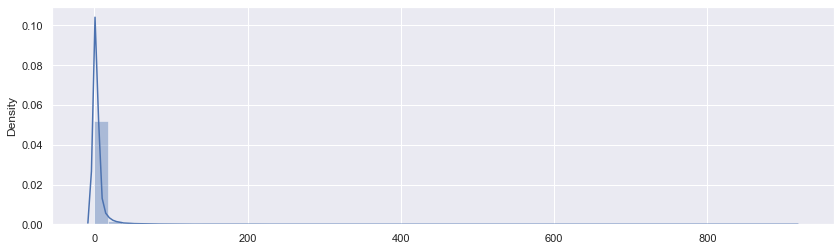

In [6]:
# plot distribution

degrees_values = sorted([v for v in dict(nodes_degrees).values()], reverse=True)

print(degrees_values[:20])

fig = plt.figure(figsize = (14,4))
sns.set()
sns.distplot(degrees_values)

From the above plot, we can see that many nodes/users have 0 or 1 degree, i.e. these users are not connected to any other users, or connected to only a single user. Let's create a _subgraph_ without these nodes:

In [7]:
# let's create a list with nodes that have degree > 1

selected_nodes_list = [n for n,d in dict(nodes_degrees).items() if d > 1]

# create a subgraph with only nodes from the above list
subgraph_without_0_1_degree_nodes = nx_users_graph.subgraph(selected_nodes_list)
print(nx.info(subgraph_without_0_1_degree_nodes))
subgraph_degree = subgraph_without_0_1_degree_nodes.degree()
print(list(dict(subgraph_degree).items())[:10])

Name: 
Type: DiGraph
Number of nodes: 7688
Number of edges: 36032
Average in degree:   4.6868
Average out degree:   4.6868
[('tonyled', 5), ('Pigeoncow', 1), ('amg', 3), ('gonzogeologist', 2), ('DaOskieWoskie', 2), ('fronkensteen', 3), ('TopWizard', 1), ('tdt0005', 24), ('soccbowler', 10), ('William_Nilliam', 6)]


/Users/noa/Documents/Y-Data/Fall 2/Unsupervised learning/venv/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

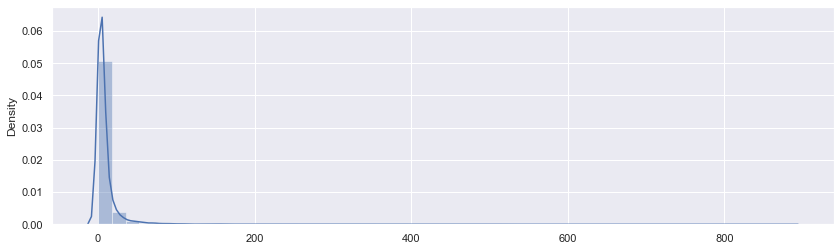

In [9]:
fig = plt.figure(figsize = (14,4))
sns.set()
sns.distplot([v for v in dict(subgraph_degree).values()])

*Task 2*: Create a subgraph of the top-20 users according to the PageRank algorithm. Draw the subgraph.

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 226
Average in degree:  11.3000
Average out degree:  11.3000


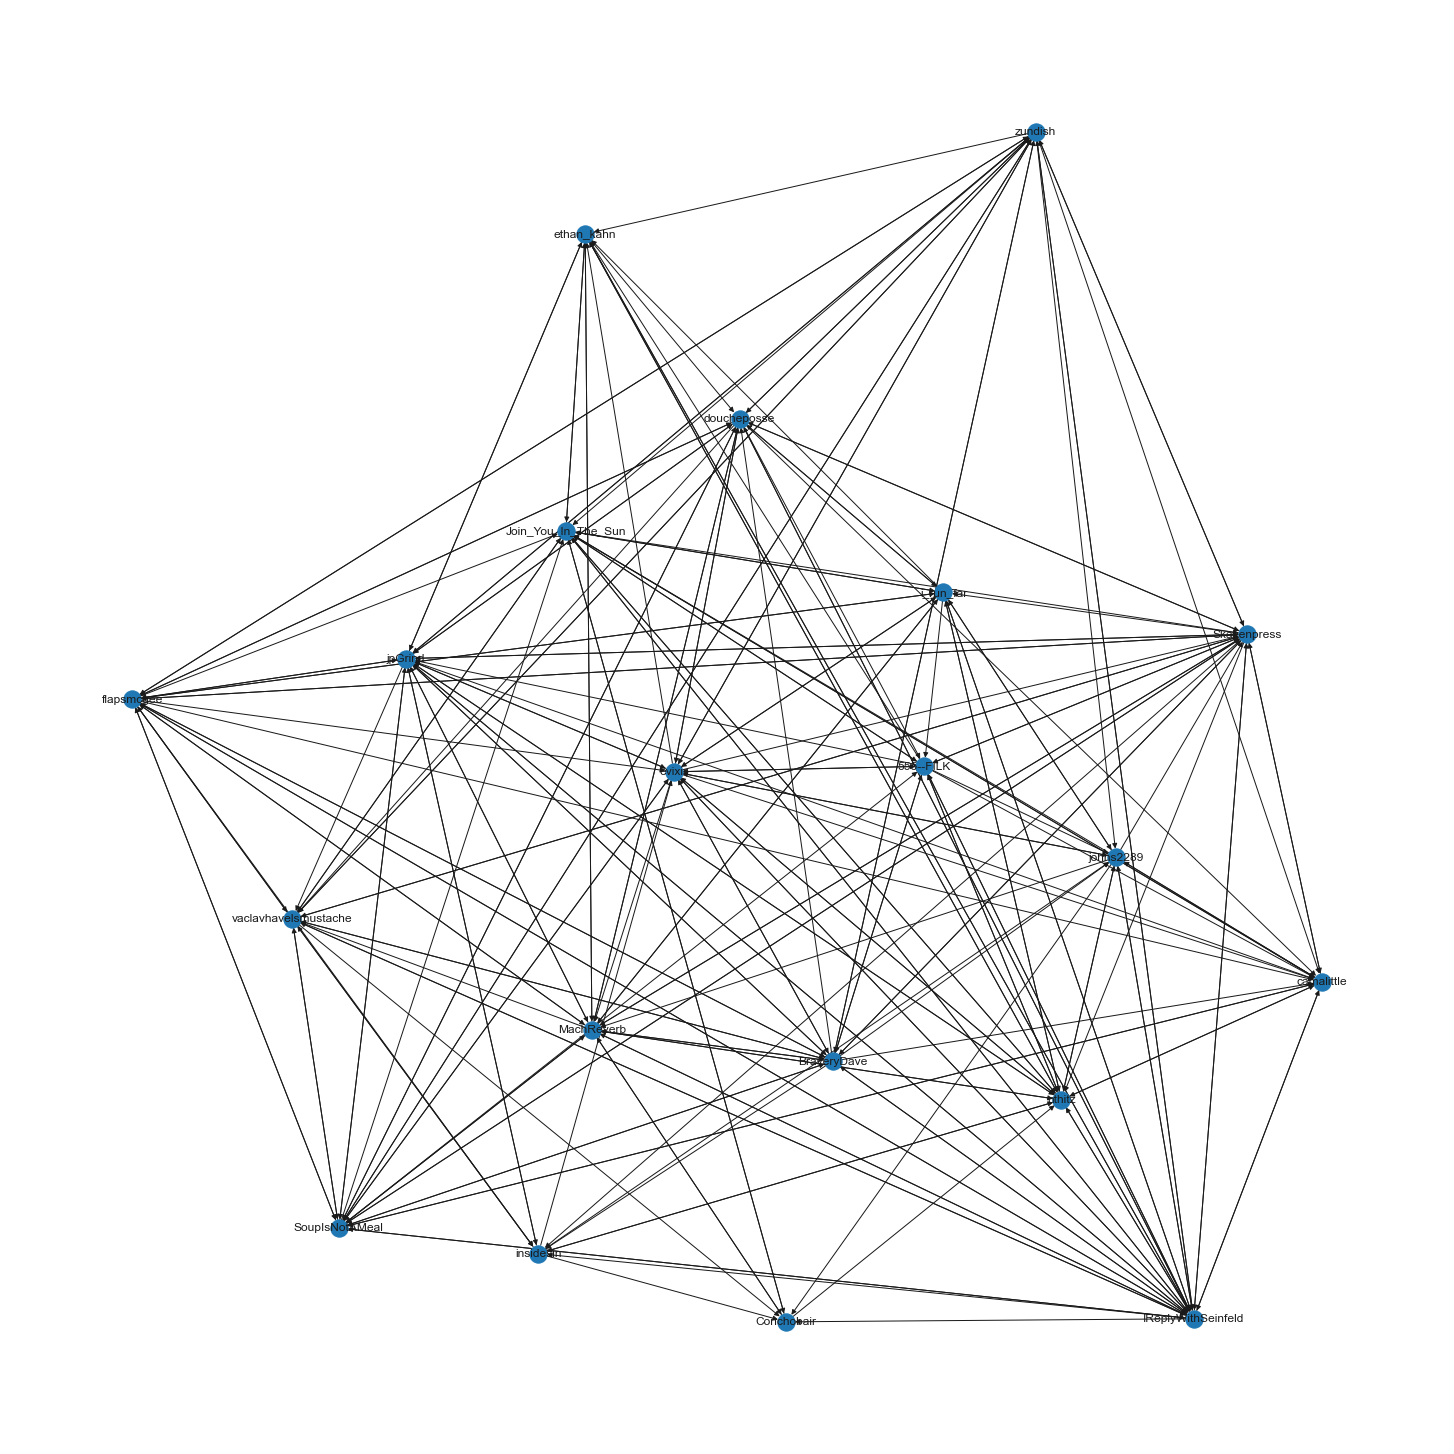

In [11]:
#According to PageRank who is the most centeral user:

page_rank_deg = nx.pagerank(nx_users_graph)
max(dict(page_rank_deg).items(), key=operator.itemgetter(1))   

# sort the dictionary and take the top 20 users
top_20_conencted_nodes = sorted(page_rank_deg.items(), key=lambda x: x[1], reverse=True)[:20]

top_20_conencted_nodes_users = [n for n,d in top_20_conencted_nodes]

# create a subgraph with only nodes from the above list
subgraph_of_most_connected_users = nx_users_graph.subgraph(top_20_conencted_nodes_users)
print(nx.info(subgraph_of_most_connected_users))


plt.figure(figsize=(20,20))

nx.draw_kamada_kawai(subgraph_of_most_connected_users, with_labels=True)

*Task 3*: Visualize the distribution of the network's strongly and weakly connected components.

* As we didn't have the chance to review this in class, you can read shortly about these terms [here](https://www.geeksforgeeks.org/check-if-a-graph-is-strongly-unilaterally-or-weakly-connected/)
* This might be helpful: [networkx.weakly_connected_components](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.weakly_connected_components.html?highlight=weakly_connected_components#networkx.algorithms.components.weakly_connected_components) 

In [12]:
# Generate a sorted list of strongly connected components
strongly_connected = [len(c) for c in nx.strongly_connected_components(nx_users_graph)]

#Generate a sorted list of weakly connected components
weakly_connected = [ len(c) for c in nx.weakly_connected_components(nx_users_graph)]

strongly connected components
[5840, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


<AxesSubplot:xlabel='component size', ylabel='# components'>

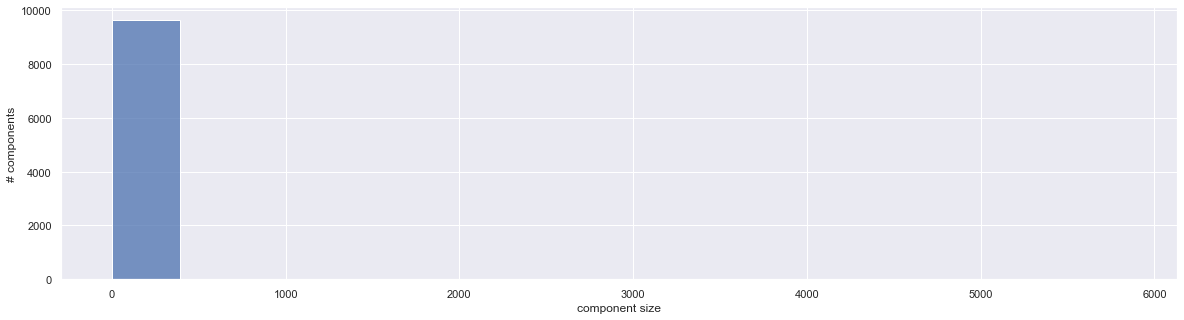

In [13]:
print('strongly connected components')
print(sorted(strongly_connected, reverse=True)[:40])
plt.figure(figsize=(20,5))
plt.xlabel('component size')
plt.ylabel('# components')
sns.histplot(strongly_connected)

***
We can see that there is one strongly connected component of size 5840, and all the rest are 5 and under.
***

weakly connected components
[10920, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


<AxesSubplot:xlabel='component size', ylabel='# components'>

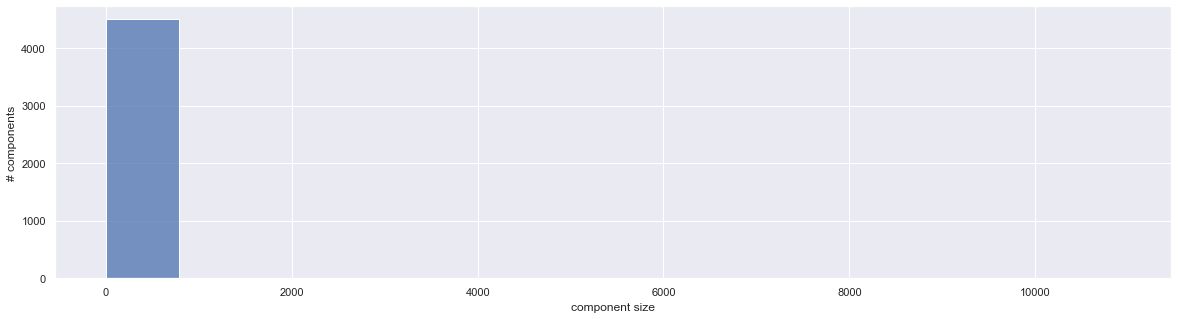

In [14]:
print('weakly connected components')
print(sorted(weakly_connected, reverse=True)[:40])
plt.figure(figsize=(20,5))
plt.xlabel('component size')
plt.ylabel('# components')
sns.histplot(weakly_connected)

***
We can see that there is one weakly connected component of size 10920, and all the rest are 3 and under.
***

*Task 4*: Split the network into communities, and find the __second__ most central vertex in each community (use degree_centrality).

In [15]:
# helper functions

def n_th_entry_in_dict(node_degrees, rank):
    rank_node = sorted(dict(node_degrees).items(), key=lambda x: x[1], reverse=True)[rank-1:rank]
    return rank_node

def find_top_n_centeral_node(graph, rank, centrality_measure = 'degree'):
        
    print("-"*100)
    print(nx.info(graph))
  
    if centrality_measure == 'degree':
        d = nx.degree_centrality(graph)
        print(f'The {rank} central node according to Degree Centrality is {n_th_entry_in_dict(d, rank)}')

    elif centrality_measure == 'page_rank':
        d = nx.pagerank(graph)
        print(f'The {rank} central node according to PageRank Centrality is {n_th_entry_in_dict(d, rank)}')

    else:
        d = nx.closeness_centrality(graph)
        print(f'The {rank} central node according to Closeness Centrality is {n_th_entry_in_dict(d, rank)}')

        
def find_central_nodes_in_communities(graph, cc, rank, threshold = 10):
    for c in cc:
        if len(c) < threshold:    # skip small communities with only few nodes
            continue
        h = graph.subgraph(c)
        find_top_n_centeral_node(h, rank)


In [16]:
print("Networkx: %s" % nx.info(nx_users_graph))
print(type(nx_users_graph))

# let's convert the graph to non-directed graph so we can find communities

non_directed_nx_users_graph = nx_users_graph.to_undirected()
type(non_directed_nx_users_graph)
print("Networkx: %s" % nx.info(non_directed_nx_users_graph))

Networkx: Name: 
Type: DiGraph
Number of nodes: 15628
Number of edges: 39533
Average in degree:   2.5296
Average out degree:   2.5296
<class 'networkx.classes.digraph.DiGraph'>
Networkx: Name: 
Type: Graph
Number of nodes: 15628
Number of edges: 33776
Average degree:   4.3225


In [19]:
# find communities

t0 = time()
cc = greedy_modularity_communities(non_directed_nx_users_graph) # this can take some time
print_duration(t0)

print(f' Found {len(cc)} communities')

took 91.023 seconds
 Found 4773 communities


[3252, 3020, 939, 339, 312, 271, 230, 229, 227, 202, 187, 145, 135, 125, 115, 105, 92, 76, 71, 59]


Text(0, 0.5, '# of communities')

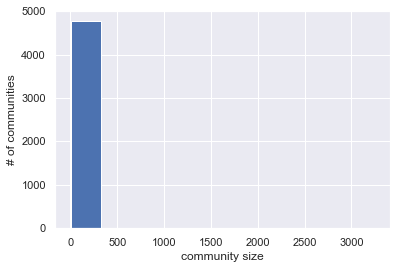

In [20]:
# plot distribution of communities sizes:

community_size_list = sorted([len(c) for c in cc], reverse=True)
print(community_size_list[:20])

plt.hist(community_size_list)
plt.xlabel('community size')
plt.ylabel('# of communities')


***
We can see we have 3 really large communities (one over 1000 nodes and two over 3000), and all the rest are under 300
***

In [21]:
# let's look at the largest communities

large_thres = 300
selected_community_list = [c for c in cc if len(c) > large_thres]

print(f'found {len(selected_community_list)} large communities (over {large_thres} nodes)')

found 5 large communities (over 300 nodes)


In [23]:
# Let's print the second most central vertex in each community, for the largest communities

find_central_nodes_in_communities(non_directed_nx_users_graph, cc, 2, threshold=large_thres)

----------------------------------------------------------------------------------------------------
Name: 
Type: Graph
Number of nodes: 3252
Number of edges: 7946
Average degree:   4.8868
The 2 central node according to Degree Centrality is [('nthitz', 0.09443248231313442)]
----------------------------------------------------------------------------------------------------
Name: 
Type: Graph
Number of nodes: 3020
Number of edges: 9823
Average degree:   6.5053
The 2 central node according to Degree Centrality is [('SoupIsNotAMeal', 0.11626366346472342)]
----------------------------------------------------------------------------------------------------
Name: 
Type: Graph
Number of nodes: 939
Number of edges: 1131
Average degree:   2.4089
The 2 central node according to Degree Centrality is [('Conchobair', 0.04051172707889126)]
----------------------------------------------------------------------------------------------------
Name: 
Type: Graph
Number of nodes: 339
Number of edges: 367

In [61]:
# Let's play with rank and threshold by using a widget
# Threshold is for minimum number of nodes in a community

import ipywidgets as widgets
from ipywidgets import interact_manual, interact, fixed

threshold =  widgets.IntSlider(min=1, max = 3100, step = 1, value=300);
rank =  widgets.IntSlider(min=1, max = 10, step = 1, value=2);

interact(find_central_nodes_in_communities, graph = fixed(non_directed_nx_users_graph), 
         cc = fixed(cc), rank = rank, threshold = threshold)


interactive(children=(IntSlider(value=2, description='rank', max=10, min=1), IntSlider(value=300, description=…

<function __main__.find_central_nodes_in_communities(graph, cc, rank, threshold=10)>

## Part 2

In [27]:
import networkx as nx
from networkx.algorithms.centrality import *
from scipy.stats import spearmanr 
from networkx.generators.geometric import random_geometric_graph
from networkx.algorithms.community import * 

### Lets generate some networks

Every network contains four sets of nodes. $a\in \{0.1,0.01\}$ is the probability for an edge between two nodes in the same set. $b\in \{0.1,0.01\}$ is the probability for an edge between two nodes in different communities.

In [28]:
blocks = [100,100,100,100]
probs = [
        [[a,b,b,b],
         [b,a,b,b],
         [b,b,a,b],
         [b,b,b,a]]
    for a,b in [(0.01,0.01),(0.1,0.01),(0.01,0.1)]
    ]

In [29]:
nets = [nx.generators.community.stochastic_block_model(blocks,p) for p in probs*100]
print("There are {} networks in total.".format(len(nets)))


There are 300 networks in total.


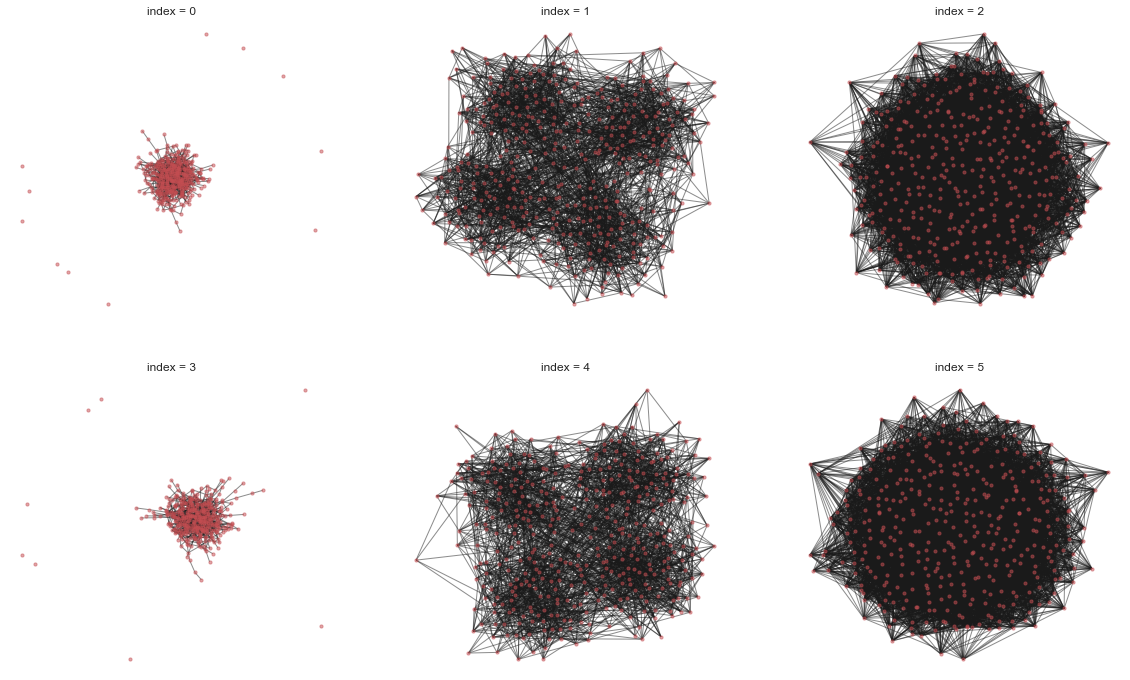

In [30]:
# draw some of the nets:

fig = plt.figure(figsize=(20,12))
rows = 2
cols = 3

for i in range(6):
    fig.add_subplot(rows, cols, i+1)
    plt.title(f'index = {i}')
    nx.draw(nets[i], with_labels = False, node_size=10, node_color ='r', alpha=0.5) 

***
nets is a list of graphs, every graph has four sets of nodes with different probs for edges between 
them and edges in other communities. We can see that there are 3 different types of graphs according to (a,b) values: 

- (0.01,0.01): indices 0,3)
- (0.1,0.01): (indices 1,4) 
- (0.01,0.1): (indices 2,5) 
***

### Node centrality 
Your code is here: replace [] accordingly to the comment in the row



In [31]:
t0 = time()
centralities =  [ {
                    'degree':[nx.degree_centrality(G).values()], #replace [] with a sequence of node degree centralities 
                    'closeness':[nx.closeness_centrality(G).values()], #replace [] with a sequence of node closeness centralities  
                    'betweenness': [nx.betweenness_centrality(G).values()] #replace [] with a sequence of node betweenness centralities
                  } 
                for G in nets
                ]
print_duration(t0)

took 202.282 seconds


centralities is a list of 300 dictionaries, each has 3 entries for different centralities metrics
and each of those dictionaries is has a list of 400 entries for centrality of each node.

In [32]:
# here we compute the corralations between the three centrality measures for each network
# every network is characterized by the tripplet of centrality correlations

centrality_correlations = [
    (
        spearmanr(list(c['degree'][0]), list(c['closeness'][0]), axis=1)[0],
        spearmanr(list(c['degree'][0]), list(c['betweenness'][0]), axis=1)[0],
        spearmanr(list(c['betweenness'][0]), list(c['closeness'][0]), axis=1)[0],
    )
    for c in centralities
]


In [33]:
# print(centrality_correlations)

### Build a meta-network

where networks are nodes connected by an edge if their centrality correlations are similar 

In [34]:
radius = 0.025
centrality_corr_graph = random_geometric_graph(n=len(nets), radius=radius, dim=3, pos=dict(enumerate(centrality_correlations)))

In [35]:
print("number of nodes in centrality_corr_graph is the same as the number of networks in nets:{}".format(centrality_corr_graph.number_of_nodes()))
print("number of edges in centrality_corr_graph is:{}".format(centrality_corr_graph.number_of_edges()))

number of nodes in centrality_corr_graph is the same as the number of networks in nets:300
number of edges in centrality_corr_graph is:10671


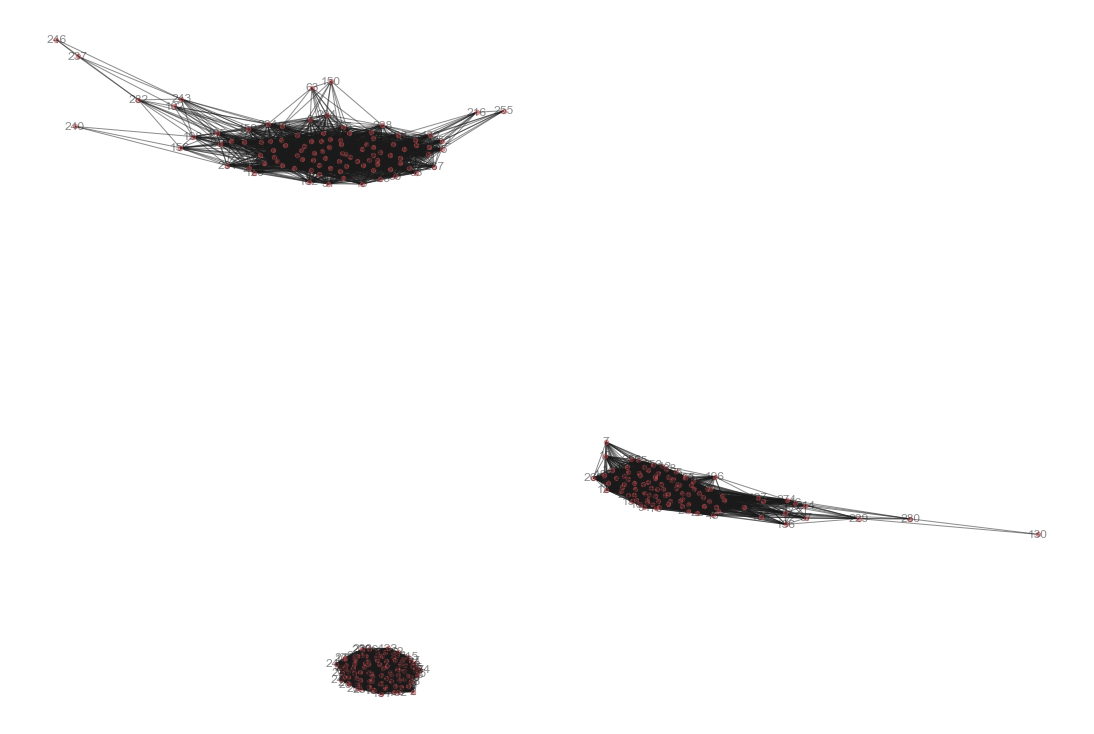

In [36]:
plt.figure(figsize=(15,10))
nx.draw(centrality_corr_graph, with_labels = True, node_size=20, node_color ='r', alpha=0.5) 

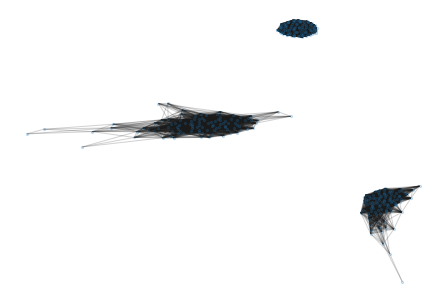

In [37]:
pos = nx.spring_layout(centrality_corr_graph)
nx.draw(centrality_corr_graph, pos=pos,node_size=5,alpha=0.2)

### Communities

#### What is the number of communities in nets[1]?
- Use _greedy_modularity_communities_

In [38]:
curr_net = nets[1]

In [39]:
#find the community structure of nets[1] and print the number of communities in nets[1]

t0 = time()
cc = greedy_modularity_communities(curr_net) # this can take some time
print_duration(t0)

print(f'Found {len(cc)} communities in nets[1]')

took 0.247 seconds
Found 4 communities in nets[1]


#### How could you know it without running community detection?

We could see this by visualizing the network:

In [ ]:
plt.figure(figsize=(15,10))
nx.draw(nets[1], with_labels = False, node_size=20, node_color ='r', alpha=0.5) 

*** 
Also when the probability for an internal edge, within the block, is much higher than the probability for an edge to a differnt block, it will result in dense connections inside the block and sparse connections to the rest of the graph - this is exactly the definition of community so the 4 blocks will be the 4 communities.
***

Let's look at the distribution of the number of communities for the different network types:

In [67]:
def plt_histogram_of_communities_distribution(net_type):
    indices = np.arange(net_type,len(nets), 3) # i.e: 0, 3, 6,... / 1, 4, 7,... / 2, 5, 8,...
    lst_com=[len(greedy_modularity_communities(nets[i])) for i in indices]
    avg = np.mean(lst_com)
    plt.title(f'# communities for type {net_type}, mean = {avg}')
    plt.hist(lst_com)
    

def avg_communities_and_plot(net_type):
    # find avg and plot histogram
    fig.add_subplot(1, 2, 1)
    plt_histogram_of_communities_distribution(net_type)
    # plot
    fig.add_subplot(1, 2, 2)
    plt.title(f'type = {i}')
    nx.draw(nets[i], with_labels = False, node_size=10, node_color ='r', alpha=0.5) 
    

took 68.675 seconds


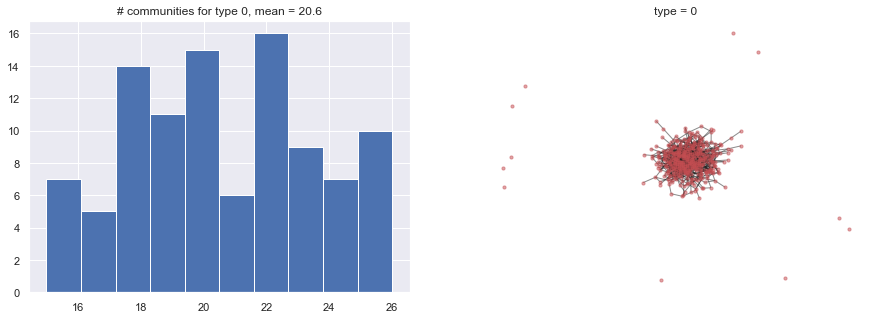

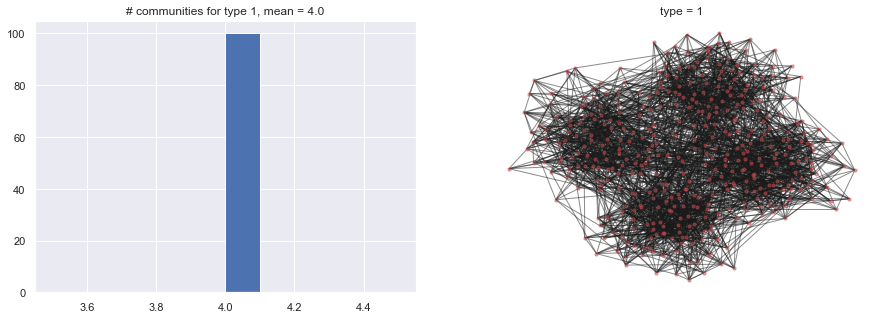

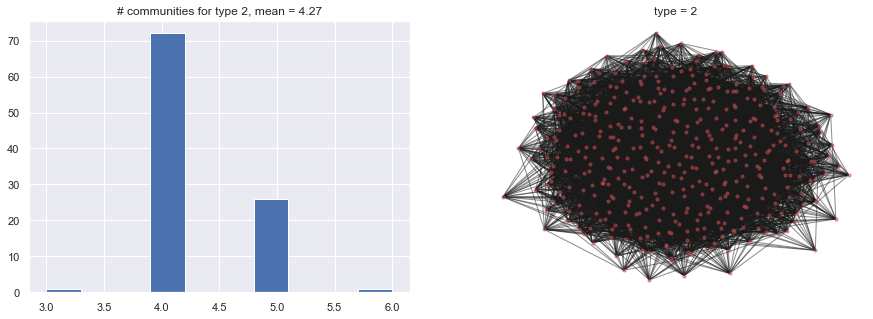

In [68]:
t0 = time()

for i in range(3):
    fig = plt.figure(figsize=(15,5))
    avg_communities_and_plot(i)
    
print_duration(t0)


#### What is the number of communities in the meta-network G (centrality_corr_graph) ?

In [ ]:
t0 = time()
cc = greedy_modularity_communities(centrality_corr_graph) # this can take some time
print_duration(t0)

print(f'Found {len(cc)} communities in centrality_corr_graph')

#### Can you explain why this is the number of communities in G? 

***
__The reason there are 3 communities:__

As G (centrality_corr_graph) is created by random_geometric_graph, nodes that are going to be closer together (and thus in the same community) will be nodes that are 'closer' to each other in terms of their spearman correlations, meaning, nodes that have similar values of spearman correlations between closeness, degree and betweeness. (This is because random_geometric_graph joins two nodes by an edge if the distance between the nodes is at most radius, which is very small in our case (0.0025). The reason there are three communities is we created the networks with 3 types of networks (based on the (a,b) values which determine their comminities structure, as we explained earlier). Since every type of network has it's own structure, as shown earlier in the plots, and differnt structure dictates different centarility measures of the nodes in the network, the spearman correlations of the nodes in each network of the same type will be similar, thus the meta network has 3 communities (one for each type of networks basically).

***